# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

# Write your answer here and turn the cell type into markdown
The task of predicting flight delays depends upon numerous variables like time, airline, distance, weather conditions, etc. It's quite challenging to predict delays using traiditional algorithms or rule-based system due to high dimensionality of data, and their inefficiencies in revealing complex pattern. Machine Learning provides the capacity to process large amount of data and reveal complex patterns in the data to possibly make accurate delay predictions. Thus, ML is an appropriate solution to deploy in this case.

### 2. Formulate the business problem, success metrics, and desired ML output.


#### Business Problem:
 Unexpected flight delays are of major concern for the customers, as they can disrupt the plans of customer and cause decrease in satisfaction of the customer. This ultimately result in reduced revenue from customer from the travel booking website. By implementing a delay prediction system, which predicts delays that are induced by weather and other factors, the website can gather more customers, gain their trust and generate more revenue for the business. How can the available data be utilized to predict delays in flight and make the platform the most trusted in the booking website business.

#### Success Metrics:
1. Achieve a recall of at least 80% for the delayed flights, so that maximum number of delays are captured by the model.
2. Achieve a precision of at least 80% to ensure that the flights that have been predicted as delayed are indeed delayed, increasing the trustworthiness of the model.
3. Achieve an AUC-ROC score of at least 0.80 ensuring that the model has 81% chance of correctly distinguishing between delays and no delays.

#### Desired ML Output:
The ML model should be able to predict whether a flight will experience delays or not based on various factors like time, origin, airline, distance, weather, etc.


### 3. Identify the type of ML problem you’re dealing with.

As well have large amount of labelled data with target and input features. This is a supervised learning problem. In addition to that, the target variable is either 0(indicating no delay) or 1(indicating delay), this is a binary classification problem. Overall, considering the type of data and output, this is a supervised binary classification problem.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [2]:
import os
from pathlib2 import Path
from zipfile import ZipFile, BadZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [3]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'data/data_compressed'
base_path = Path().resolve() #'the folder that contains the whole project (data and code)'
csv_base_path = 'data/csv_files'

# Create directory if it doesn't exist
if not os.path.exists(csv_base_path):
    os.makedirs(csv_base_path)

In [21]:
# How many zip files do we have? write a code to answer it.
directory = base_path/zip_path  # Replace with the path to your directory
zip_count = 0
# to store the names of zip_files later to be used in extracting the csvs
zip_files = []
for filename in os.listdir(directory):
    if filename.endswith('.zip'):
        full_path_of_zip = os.path.join(directory, filename)
        try:
            # Validate if it is a correct zip file
            with ZipFile(full_path_of_zip, 'r') as zip_ref:
                if zip_ref.testzip() is None:
                    zip_count += 1
                    zip_files.append(full_path_of_zip)
        except BadZipFile:
            print(f"{filename} is not a valid zip file.")

print(f"There are {zip_count} valid zip files.")

There are 60 valid zip files.


#### Extract CSV files from ZIP files

In [23]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting D:\MDS\DST\FinalAssignment\data\data_compressed\On_Time_Reporting_Carrier_On

In [24]:
# How many csv files have we extracted? write a code to answer it.
csv_count = 0
for filename in os.listdir(base_path/csv_base_path):
    if filename.endswith('.csv'):
        csv_count += 1
print(f"Total Csv Files Extracted: {csv_count}")

Total Csv Files Extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [40]:
from IPython.display import IFrame, display, HTML

path_html = os.path.relpath(os.path.join(csv_base_path, "readme.html"))

with open(path_html,'r') as f:
    content = f.read()
display(HTML(content))

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [43]:
path_for_file = os.path.join(csv_base_path,'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')
df_temp = pd.read_csv(path_for_file) # **ENTER YOUR CODE HERE**

**Question**: Print the row and column length in the dataset, and print the column names.

In [44]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [45]:
# Enter your code here
df_temp.head(10)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   
5                     20363                          9E      N316PQ  ...   
6                     20363                          9E      N916XJ  ...   
7                     20363                          9E      N371CA  ...   
8                     20363                          9E      N601LR  ...   
9                     20363                          9E      N906XJ  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   
5          NaN          NaN            NaN               NaN          NaN   
6          NaN          NaN            NaN               NaN          NaN   
7          NaN          NaN            NaN               NaN          NaN   
8          NaN          NaN            NaN               NaN          NaN   
9          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  
5            NaN              NaN            NaN         NaN           NaN  
6            NaN              NaN            NaN         NaN           NaN  
7            NaN              NaN            NaN         NaN           NaN  
8            NaN              NaN            NaN         NaN           NaN  
9            NaN              NaN            NaN         NaN           NaN  

[10 rows x 110 columns]

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [47]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [48]:
# Enter your code here
columns_with_del = [col for col in df_temp.columns if 'Del' in col]

# Print the columns that contain 'Del'
print(columns_with_del)

['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [51]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_shape[0] , " and ", df_shape[1])
print("The years in this dataset are: ", df_temp['Year'].unique())
print("The months covered in this dataset are: ", df_temp['Month'].unique())
print("The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [52]:
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [55]:
counts.sort_values(by=['Origin','Destination'],ascending=False).head(15 )# Enter your code here

Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

The dataset provided has a vast quantity of data with features related to temporal details, airline performance, airport characteristics. These can provide potential hint regarding flight delays. However, it's not quite possible to predict the delay just by looking at the data values due to various complex patterns existing in the data that might go unnoticed to us.

We could, however, employ a machine learning algorithm that learns from this huge data to uncover the intricate relationships between the features and delay prediction. By careful feature engineering and model selection, it is possible to predict delays by utilizing the model trained on the data.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [4]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame()

    # loop over all the csv files
    for file in csv_files:
        # read the file
        df_file = pd.read_csv(file)

        # filter based on columns
        df_file = df_file[filter_cols]

        for col, val in zip(subset_cols, subset_vals):
            # filter based on subset cols and subset vals
            df_file = df_file[df_file[col].isin(val)]
        # concat the data frames
        df = pd.concat([df, df_file], ignore_index=True)

    # save the frame
    df.to_csv(file_name, index=False)


In [5]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [6]:
# getting name of all the csv files
csv_file_names = []
for filename in os.listdir(base_path/csv_base_path):
    if filename.endswith('.csv'):
        full_path_of_file = os.path.join(csv_base_path, filename)
        csv_file_names.append(full_path_of_file)

In [7]:
csv_file_names

['data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_7.csv',
 'data/csv_files\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present

In [8]:
start = time.time()

combined_csv_filename = f"{base_path}/data/combined_files.csv"

# < write code to call the combined_csv function>
combine_csv(csv_file_names,cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 2.09 minutes


#### Load dataset

Load the combined dataset.

In [9]:
data = pd.read_csv(f"{base_path}/data/combined_files.csv")# Enter your code here to read the combined csv file.

Print the first 5 records.

In [10]:
data.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0              3     -20.0              0.0       0.0     99.0  
1     731.0              3      -3.0              0.0       0.0     98.0  
2    1199.0              5      -7.0              0.0       0.0    174.0  
3    1587.0              7      -4.0              0.0       0.0    233.0  
4    1587.0              7     -13.0              0.0       0.0    179.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [11]:

# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data["FlightDate"]))
print("The airlines covered in this dataset are: ", list(data["Reporting_Airline"].unique()))
print("The Origin airports covered are: ", list(data["Origin"].unique()))
print("The Destination airports covered are: ", list(data["Dest"].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [12]:
data["ArrDel15"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1658125    0.0
1658126    0.0
1658127    1.0
1658128    0.0
1658129    0.0
Name: ArrDel15, Length: 1658130, dtype: float64

In [13]:
data.rename(columns={"ArrDel15":"is_delay"}, inplace=True) # Enter your code here

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [14]:
# Enter your code here
null_count = pd.DataFrame(data.isnull().sum(axis=0), columns=['Null Count'])
null_count['Percentage (%)'] = (null_count['Null Count'] / data.shape[0]) * 100

print(null_count)

                   Null Count  Percentage (%)
Year                        0        0.000000
Quarter                     0        0.000000
Month                       0        0.000000
DayofMonth                  0        0.000000
DayOfWeek                   0        0.000000
FlightDate                  0        0.000000
Reporting_Airline           0        0.000000
Origin                      0        0.000000
OriginState                 0        0.000000
Dest                        0        0.000000
DestState                   0        0.000000
CRSDepTime                  0        0.000000
Cancelled                   0        0.000000
Diverted                    0        0.000000
Distance                    0        0.000000
DistanceGroup               0        0.000000
ArrDelay                22540        1.359363
ArrDelayMinutes         22540        1.359363
is_delay                22540        1.359363
AirTime                 22540        1.359363


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [15]:
# Since only 1.35% of data is missing, we will remove the null rows
data = data.dropna()

Get the hour of the day in 24-hour time format from CRSDepTime.

In [16]:
# gettint hour of day by removing the last two digits using division by 100 and conversion to int
data['DepHourofDay'] = (data['CRSDepTime'] // 100).astype(int)

In [17]:
data['DepHourofDay']

0          21
1           9
2          18
3          16
4           7
           ..
1658125    11
1658126     8
1658127    12
1658128    22
1658129    16
Name: DepHourofDay, Length: 1635590, dtype: int32

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

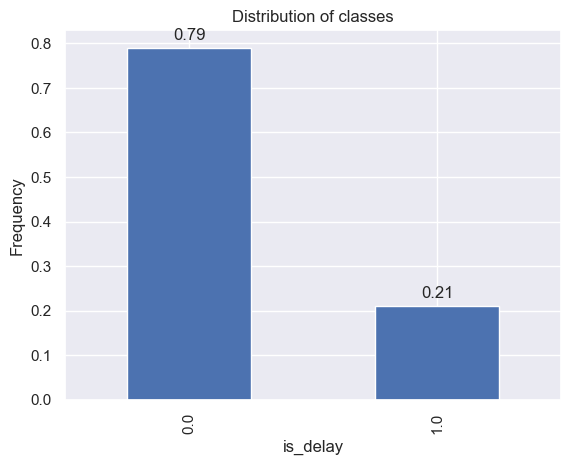

In [18]:
ax = (data.groupby("is_delay").size()/len(data)).plot(kind='bar')

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

From the graph, the following deductions can be made:
1. The no delay has significantly higher frequency as compared to delay data. This implies that majority of flights in the given time period were not delaye
2. There is a ratio close to 4:1 for flights without delay to flights with delay from the given graph. This implies that for every 4 flights that depart on time, there's bout 1 flight that experiences delay.
3. As the dataset is highyl imbalanced, machine learning model might be biased towards predicting flight as not delayed, leading to high number of false negative for delayed flights.
4. As the dataset is highly imbalanced, metrics like accuracy for model performance is rendered useless, as even if all the targets are generated as normal, the accuracy would be 0.79. So, over metrics like precision, recall, auc-roc curve for delay need to be accessed.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

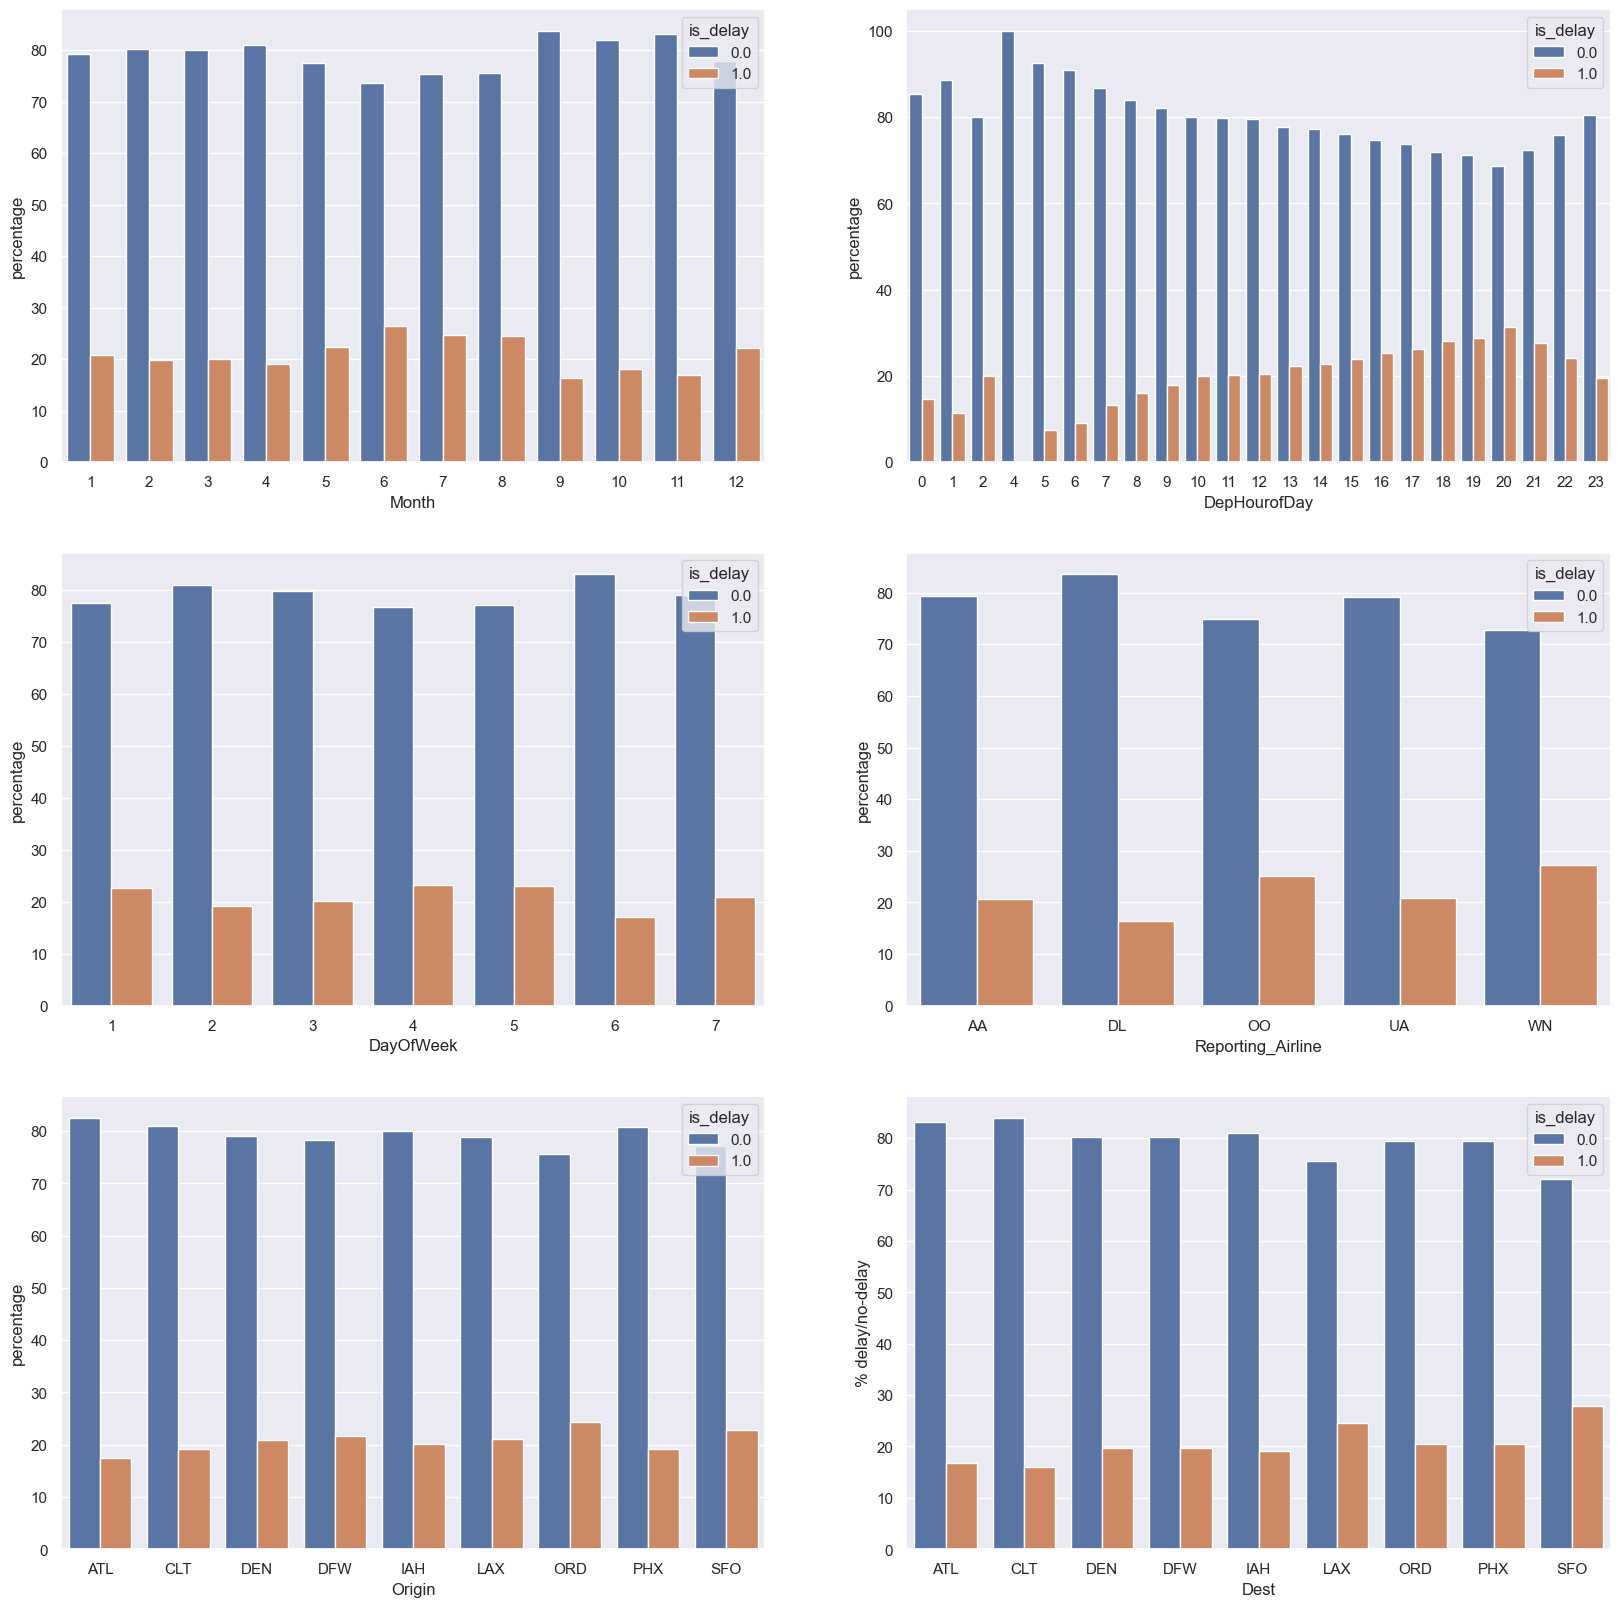

In [19]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')


plt.show()

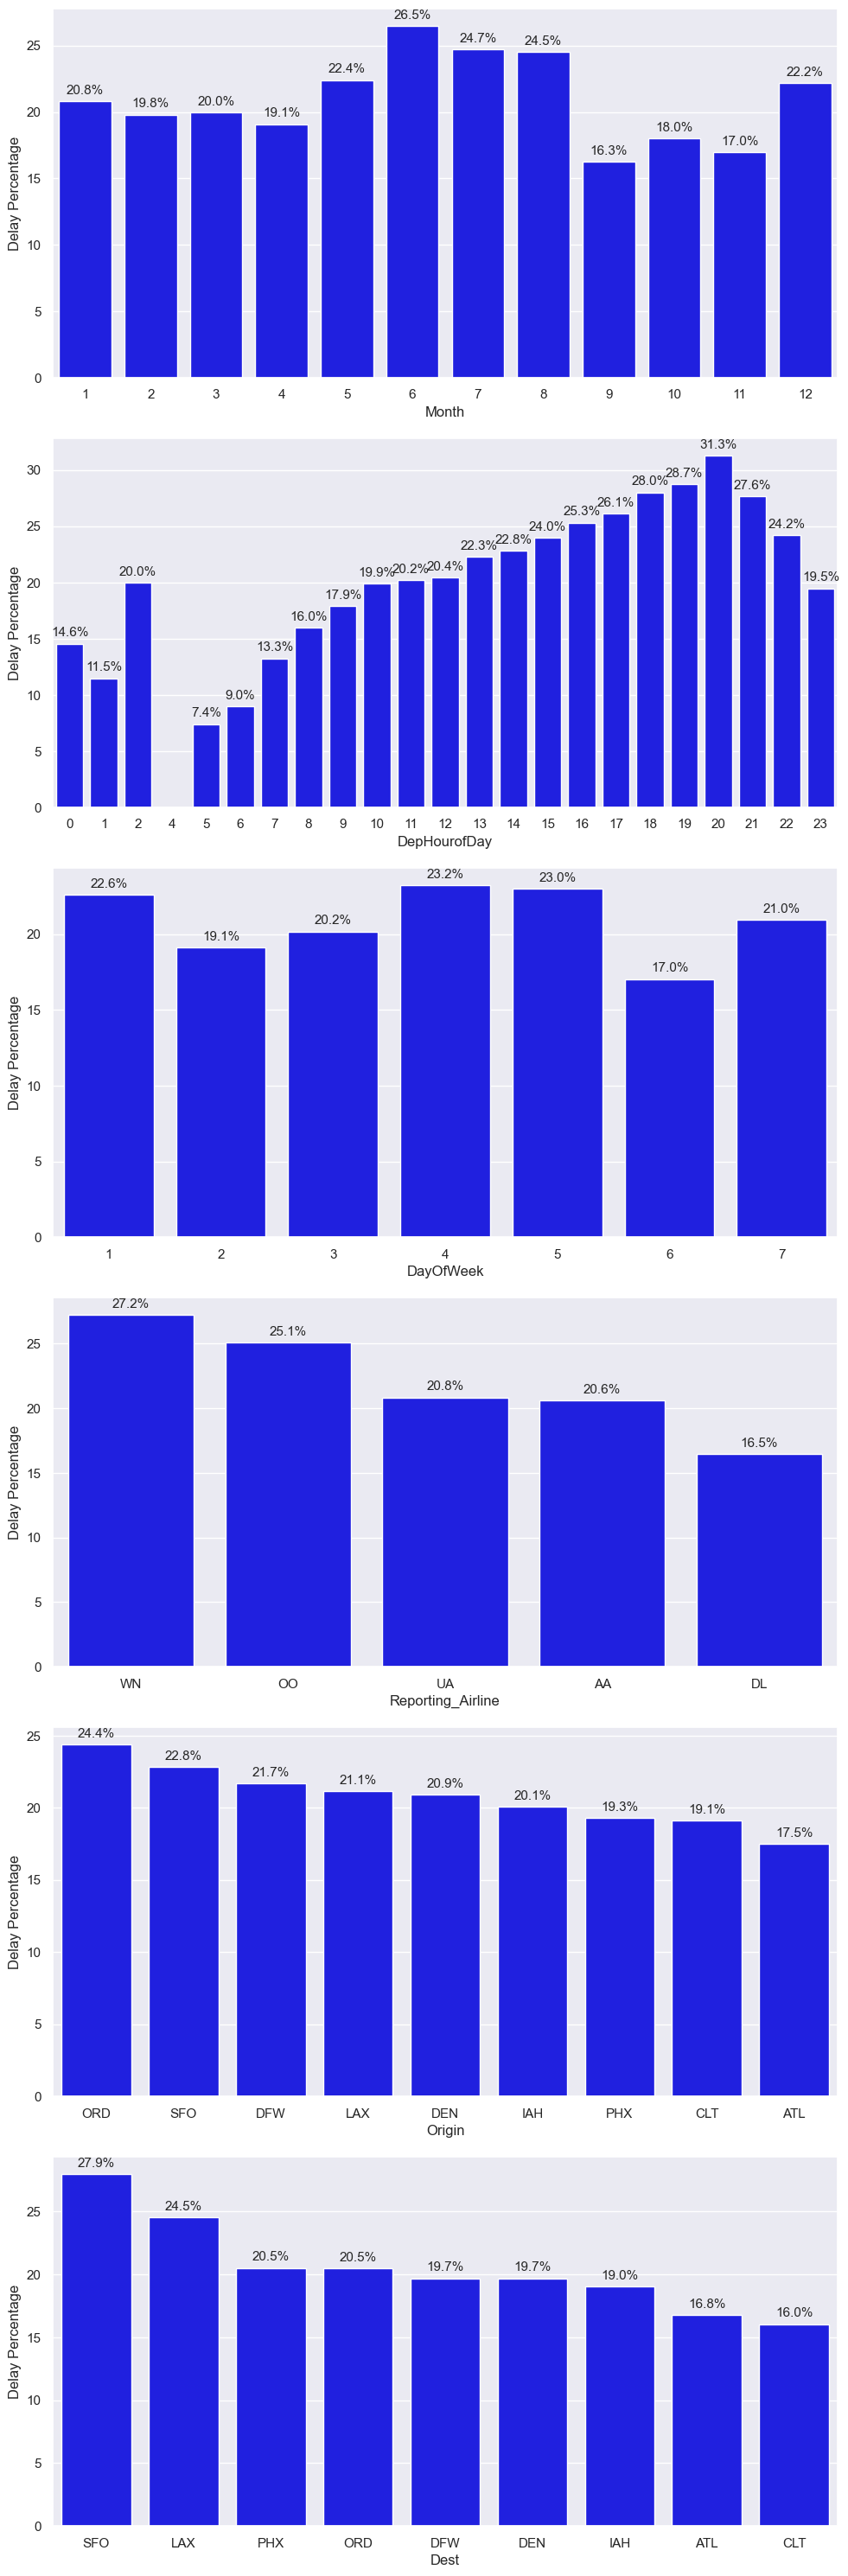

In [20]:


viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(len(viz_columns), 1, figsize=(10,30))

for idx, column in enumerate(viz_columns):
    ax = axes[idx]
    total_counts = data.groupby(column).size()
    delay_counts = data[data['is_delay'] == 1].groupby(column).size()

    # Calculate percentage of delays for each category value
    delay_percentage = (delay_counts / total_counts * 100).rename('percentage').reset_index().sort_values(by='percentage', ascending=False)

    sns.barplot(x=column, y="percentage", data=delay_percentage, ax=ax, color='blue')

    # Add data values on top of bars with reduced font size
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points',
                    fontsize=11)

    ax.set_ylabel('Delay Percentage')

plt.tight_layout()
plt.show()


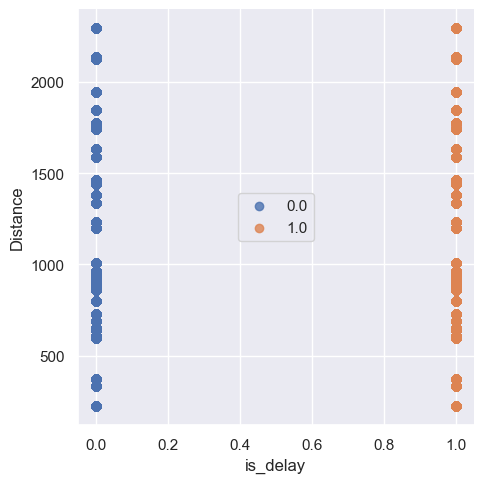

In [21]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

#### Which months have the most delays?
Ans: The 6th Month (June) seems to have the most delays with 26.5% flights being delayed that month

#### What time of the day has the most delays?
Ans: Hour 20 has the most delays in a day, with about 31.3% of flights being delayed that dat

#### What day of the week has the most delays?
Ans: Day 4(Thursday) seems to have the most delays of the week, with 23.2% flights that day being delayed.

#### Which airline has the most delays?
Ans: WN has the most delays, with about 27.2% of all delays being experienced by this airline.

#### Which origin and destination airports have the most delays?
Ans: ORD has the most delays among origins with 24.4% delays and SFO has the most delays among destination airports with about 27.9% delays.

#### Is flight distance a factor in the delays?
Ans: From the scatterplot, it can be seen that both long and short distance lights experience delays, and there's no evident cocentration of delays in any particular distance segments. Thus, flight distance doesn't seem to influence the delays.

### Features

Look at all the columns and what their specific types are.

In [23]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [24]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int32
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [25]:
data_orig = data.copy()


In [26]:
data = data_orig[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
              'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
                        'Reporting_Airline', 'Origin', 'Dest']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [27]:
# Create dummy variables for the categorical columns
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the original data and the dummy variables
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns
data.drop(categorical_columns, axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [28]:
# Enter your code here
data.shape

(1635590, 73)

In [29]:
# Enter your code here
data.columns


Index(['is_delay', 'Distance', 'DepHourofDay', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [30]:
data.rename(columns = {"is_delay":"target"}, inplace=True )# Enter your code here

In [31]:
# converting the data to float64 to make all the data numeric
data = data.astype('float64')

In [32]:
data.shape

(1635590, 73)

In [116]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
data.to_csv('data/combined_csv_v1.csv',index=False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [33]:
# write Code here to split data into train, validate and test
# splitting with 80% to train and 20% to test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])
X_train = train_data.drop("target", axis=1)
Y_train = train_data["target"]
X_test = test_data.drop("target", axis=1)
Y_test = test_data["target"]

In [34]:
print(f"Train Data: {X_train.shape, Y_train.shape}")
print(f"Test Data: {X_test.shape, Y_test.shape}")

Train Data: ((1308472, 72), (1308472,))
Test Data: ((327118, 72), (327118,))


### Baseline classification model

In [53]:
# <write code here>
# defining baseline logistic classification model
baseline_logistic_regression = LogisticRegression(max_iter=1000)
baseline_logistic_regression.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

In [54]:
target_predicted = baseline_logistic_regression.predict(X_test)
target_predicted_prob = baseline_logistic_regression.predict_proba(X_test)

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [55]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # Generate the confusion matrix using sklearn
    cm = confusion_matrix(test_labels, target_predicted)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=['No Delay', 'Delay'],
                yticklabels=['No Delay', 'Delay'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


In [56]:
def report_statistics(test_labels, target_predicted):
    # Generate the confusion matrix
    cm = confusion_matrix(test_labels, target_predicted)

    # Extracting true positive, false positive, true negative, false negative
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Calculating Accuracy
    accuracy = (TP + TN) / (TP + FP + TN + FN)

    # Calculating Precision
    precision = TP / (TP + FP)

    # Calculating Recall (Sensitivity)
    recall = TP / (TP + FN)

    # Calculating Specificity
    specificity = TN / (TN + FP)

    # Print statistics
    print("Report Statistics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall (Sensitivity): {recall}")
    print(f"Specificity: {specificity}")

    return accuracy, precision, recall, specificity

In [57]:
from sklearn import metrics

def plot_roc(test_labels, target_probs):
    # Compute the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_probs)

    # Compute the area under the ROC curve (AUC)
    auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(10,7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [58]:

def generate_confusion_report(test_labels, target_predicted):
    # Generate the confusion matrix
    cm = confusion_matrix(test_labels, target_predicted)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Generate and print the classification report
    cr = classification_report(test_labels, target_predicted)
    print("\nClassification Report:")
    print(cr)

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

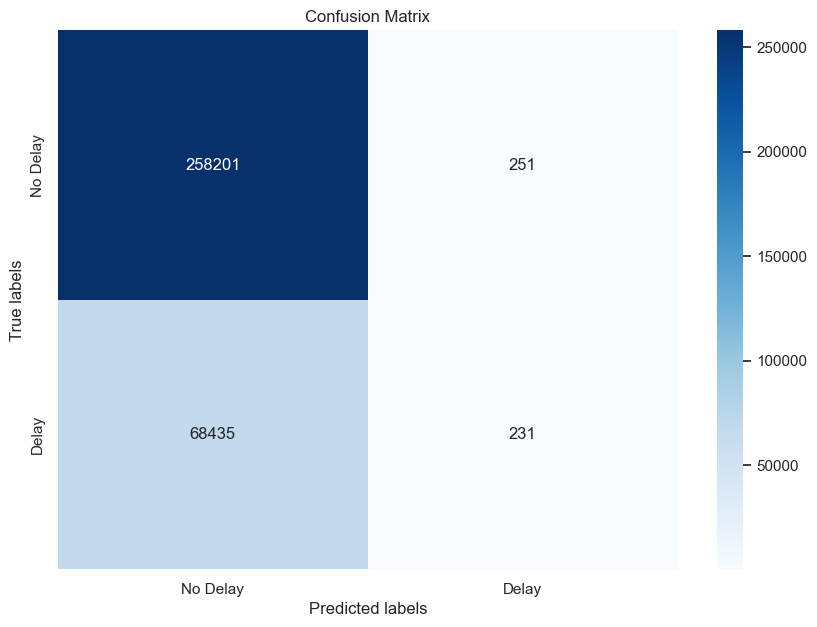

In [59]:
# Enter you code here
plot_confusion_matrix(Y_test, target_predicted)


To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

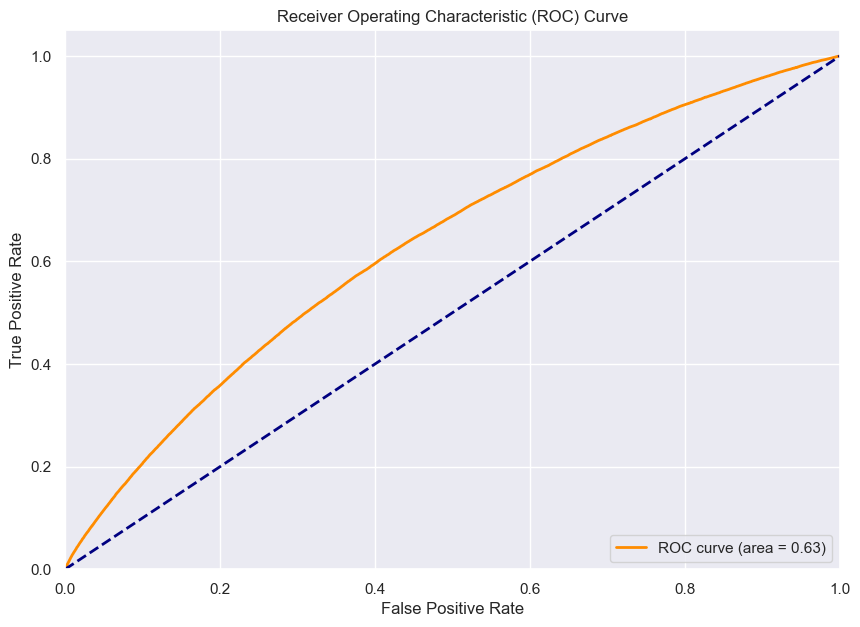

In [60]:
# Enter you code here
plot_roc(Y_test, target_predicted_prob[:,-1])

In [61]:
generate_confusion_report(Y_test, target_predicted)

Confusion Matrix:
[[258201    251]
 [ 68435    231]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258452
         1.0       0.48      0.00      0.01     68666

    accuracy                           0.79    327118
   macro avg       0.63      0.50      0.44    327118
weighted avg       0.73      0.79      0.70    327118



In [62]:
report_statistics(Y_test, target_predicted)

Report Statistics:
Accuracy: 0.7900268404673543
Precision: 0.47925311203319504
Recall (Sensitivity): 0.003364110331168264
Specificity: 0.9990288332069398


(0.7900268404673543,
 0.47925311203319504,
 0.003364110331168264,
 0.9990288332069398)

In [63]:
# predicting on training set
target_predicted_train = baseline_logistic_regression.predict(X_train)
target_predicted_prob_train = baseline_logistic_regression.predict_proba(X_train)

In [64]:
generate_confusion_report(Y_train, target_predicted_train)

Confusion Matrix:
[[1032847     959]
 [ 273742     924]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88   1033806
         1.0       0.49      0.00      0.01    274666

    accuracy                           0.79   1308472
   macro avg       0.64      0.50      0.44   1308472
weighted avg       0.73      0.79      0.70   1308472



In [65]:
report_statistics(Y_train, target_predicted_train)

Report Statistics:
Accuracy: 0.7900597032263587
Precision: 0.49070631970260226
Recall (Sensitivity): 0.003364085835159794
Specificity: 0.9990723598044507


(0.7900597032263587,
 0.49070631970260226,
 0.003364085835159794,
 0.9990723598044507)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.

#### 1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?
Ans: The performance of model is similar on both test set and training set, with metrics such as accuracy, precision and recall being very similar. This result shows that the model generalizes consistently across the unseen data and model is not overfitting. However, the model has very low recall for delayed flight with around 0.0004, indicating models inability to predict delayed flights.

#### 2.Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?
Ans: There is significant difference in the outcomes of metrics like accuracy, precision and recall. The accuracy is comparatively high with around 0.79, but the recall is 0.003, which essentially mean the model isnt being able to capture the delayed flights, and precision of 0.503 indicates that when the model predicts a record to be delayed, its right only 50.3% of the times. The dataset provided is hugely imbalanced, where about 79% percent of data is related to flights being not delayed. As a result, the model has bias towards predicting non-delayed class, leading to high accuracy but poor recall for delayed flights.

#### 3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?
Ans: Predicting delays in flight is crucial from a business standpoint, and we aim to achieve a recall of 0.80 for our model for reliable predictability. But we managed to only get a recall of 0.003. This result isnt sufficient from our business standpoint. Thus, the following changes are being considered for next iteration:
* Scaling the Data: Scaling will ensure that all features contribute equally to the model's decision process.
* Appending More Features: Features like Holiday and Weather will be appended to dataset which have potential to influence flight delays.


#### **Question**: What can you summarize from the confusion matrix?
Ans: The following results could be summarized from the confusion matrix generated from the test set:
1. True Positive: The model correctly predicted only 231 delayed as delayed.
2. True Negative: The model correctly predicted 258201 flights as not delayed when they werent delayed.
3. False Positive: The model incorrectly predicted 251 flights as delayed while they werent delayed.
4. False Negative: The model incorrectly predicted 68435 flights as not delayed when whey were delayed for real.

Presence of high number of false negatives indicate that the model most often fails to identify delayed flights. This indicates the model is biased towards predicting non-delayed flights.


# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.



https://gitlab.com/niranjanshah/u3246250_shah_final_assignment

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [66]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].apply(lambda x: 1 if x in holidays else 0)

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [67]:
# download data from the link above and place it into the data folder
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday'],
      dtype='object')

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [68]:
weather = pd.read_csv('data/daily-summaries-2023-10-31T07-10-07.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports)) # Enter your code here
weather['airport'] = weather['STATION'].map(station_map)# Enter your code here


Create another column called `MONTH` from the `DATE` column.

In [69]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [70]:
weather.describe()

AWND          PRCP          SNOW          SNWD          TAVG  \
count  16434.000000  16434.000000  10956.000000  10956.000000  16372.000000   
mean      37.656505     22.898625      1.122855      3.487222    173.172429   
std       16.193890     91.440626     10.612414     23.419737     91.088532   
min        4.000000      0.000000      0.000000      0.000000   -222.000000   
25%       26.000000      0.000000      0.000000      0.000000    123.000000   
50%       35.000000      0.000000      0.000000      0.000000    178.000000   
75%       47.000000      0.000000      0.000000      0.000000    238.000000   
max      123.000000   4082.000000    411.000000    460.000000    407.000000   

               TMAX          TMIN  
count  16414.000000  16414.000000  
mean     229.478189    119.696235  
std       96.410222     93.249435  
min     -188.000000   -282.000000  
25%      172.000000     67.000000  
50%      233.000000    128.000000  
75%      300.000000    189.000000  
max      483.000000    350.000000

In [71]:
weather.SNOW.fillna(weather.SNOW.median(), inplace=True)
weather.SNWD.fillna(weather.SNWD.median(), inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [72]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = weather[weather['TAVG'].isna()].index
TMAX_idx = weather[weather['TMAX'].isna()].index
TMIN_idx = weather[weather['TMIN'].isna()].index
TAVG_idx

Index([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,  3965,
        3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,  3974,  3975,
        3976,  3977,  3978,  3979,  3980,  3981,  3982,  3983,  3984,  3985,
        4017,  4018,  4019,  4020,  4021,  4022,  4023,  4024,  4025,  4026,
        4027,  4028,  4029,  4030,  4031,  4032,  4033,  4034,  4035,  4036,
        4037,  4038,  4039,  4040,  4041,  4042,  4043,  4044,  4045,  4046,
        4047, 13420],
      dtype='int64')

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [73]:
weather_impute = weather.groupby(['STATION','MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

STATION MONTH       TAVG       TMAX       TMIN
0  USW00003017    01  -2.741935  74.000000 -69.858065
1  USW00003017    02  11.219858  88.553191 -65.035461

In [74]:
weather_impute

STATION MONTH        TAVG        TMAX        TMIN
0    USW00003017    01   -2.741935   74.000000  -69.858065
1    USW00003017    02   11.219858   88.553191  -65.035461
2    USW00003017    03   64.722581  146.858065  -17.070968
3    USW00003017    04   91.200000  167.440000   14.246667
4    USW00003017    05  132.580645  206.496774   65.283871
..           ...   ...         ...         ...         ...
103  USW00094846    08  231.000000  281.000000  183.503226
104  USW00094846    09  201.226667  251.826667  149.953333
105  USW00094846    10  127.683871  173.116129   79.916129
106  USW00094846    11   45.820000   85.680000    2.100000
107  USW00094846    12   -2.735484   29.522581  -36.703226

[108 rows x 5 columns]

In [75]:
weather

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0      USW00023174  2014-01-01    16     0   0.0   0.0  131.0  178.0   78.0   
1      USW00023174  2014-01-02    22     0   0.0   0.0  159.0  256.0  100.0   
2      USW00023174  2014-01-03    17     0   0.0   0.0  140.0  178.0   83.0   
3      USW00023174  2014-01-04    18     0   0.0   0.0  136.0  183.0  100.0   
4      USW00023174  2014-01-05    18     0   0.0   0.0  151.0  244.0   83.0   
...            ...         ...   ...   ...   ...   ...    ...    ...    ...   
16429  USW00013881  2018-12-27    31    41   0.0   0.0   68.0   89.0   39.0   
16430  USW00013881  2018-12-28    27   196   0.0   0.0   86.0  144.0   61.0   
16431  USW00013881  2018-12-29    14     0   0.0   0.0  146.0  189.0   94.0   
16432  USW00013881  2018-12-30    16    23   0.0   0.0  117.0  139.0   89.0   
16433  USW00013881  2018-12-31    29    41   0.0   0.0  135.0  194.0  117.0   

      airport MONTH  
0         LAX    01  
1         LAX    01  
2         LAX    01  
3         LAX    01  
4         LAX    01  
...       ...   ...  
16429     CLT    12  
16430     CLT    12  
16431     CLT    12  
16432     CLT    12  
16433     CLT    12  

[16434 rows x 11 columns]

Merge the mean data with the weather data.

In [76]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG',
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX',
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [77]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [78]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [79]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [80]:
# data_orig.dropna(inplace=True)

In [81]:
sum(data_orig.isna().any())

0

In [82]:
sum(data_orig.isna().any())

0

In [83]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [84]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [85]:
# Create dummy variables for the categorical columns
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the original data and the dummy variables
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns
data.drop(categorical_columns, axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [86]:
data.columnsIndex(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
                   'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
                   'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
                   'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
                   'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
                   'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
                   'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
                   'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
                   'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
                   'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
                   'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
                   'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
                   'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
                   'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
                   'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
                   'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
                   'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
                   'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
                   'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
                  dtype='object')

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [87]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [88]:
data = data.astype('float64')

In [89]:
data.dtypes

target          float64
Distance        float64
DepHourofDay    float64
AWND_O          float64
PRCP_O          float64
                 ...   
Dest_LAX        float64
Dest_ORD        float64
Dest_PHX        float64
Dest_SFO        float64
is_holiday_1    float64
Length: 86, dtype: object

In [90]:
sum(data.isna().any())

0

Create the training and testing sets again.

In [91]:
# Enter your code here
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data["target"])
X_train = train_data.drop("target", axis=1)
Y_train = train_data["target"]

X_test = test_data.drop("target", axis=1)
Y_test = test_data["target"]

In [92]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [93]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression(max_iter=1000)

In [94]:
# Enter your code here
classifier2.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [95]:
target_predicted_second = classifier2.predict(X_test_scaled)
target_predicted_prob_second = classifier2.predict_proba(X_test_scaled)

In [155]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
data.to_csv('data/combined_csv_v2.csv', index=False)
# note this combined file will be also used in part B

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

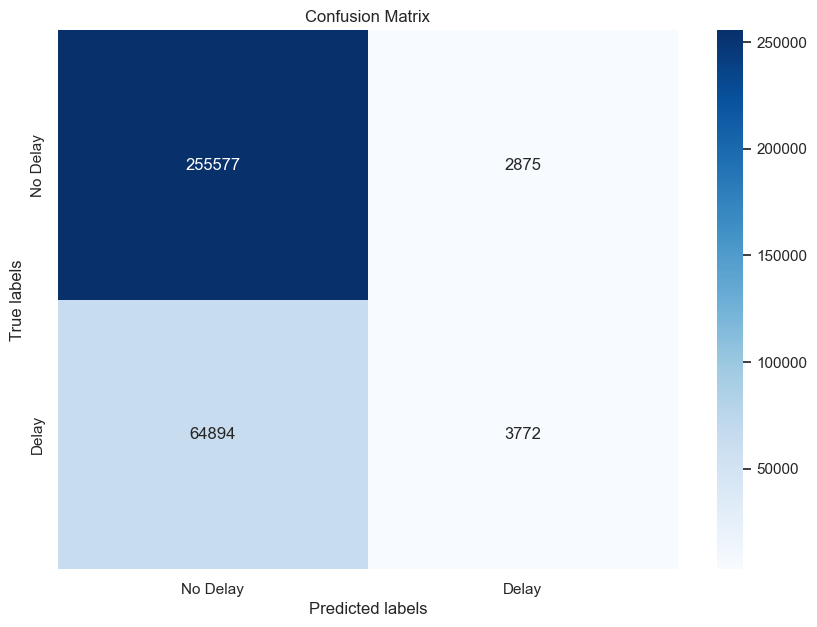

In [96]:
plot_confusion_matrix(Y_test, target_predicted_second)

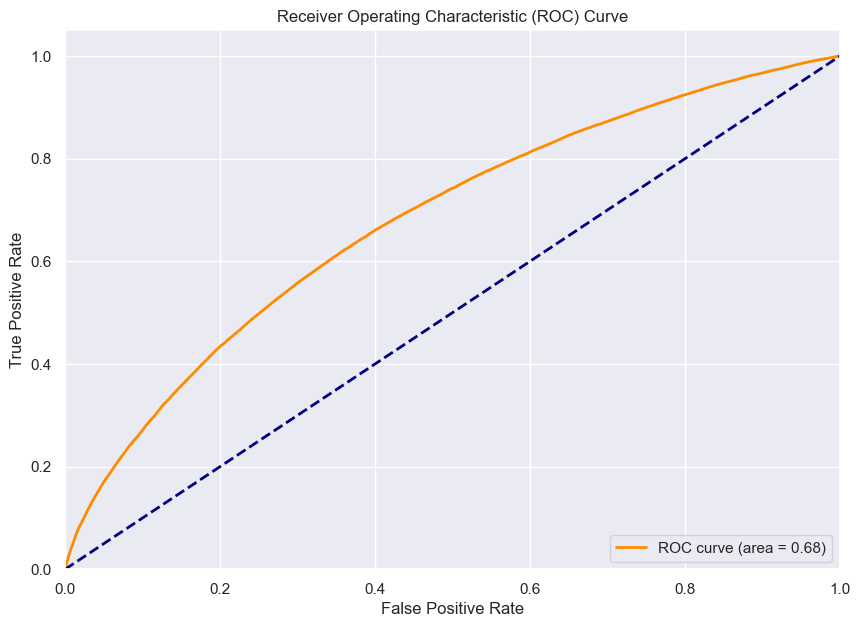

In [97]:
plot_roc(Y_test, target_predicted_prob_second[:,-1])

In [99]:
generate_confusion_report(Y_test, target_predicted_second)

Confusion Matrix:
[[255577   2875]
 [ 64894   3772]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    258452
         1.0       0.57      0.05      0.10     68666

    accuracy                           0.79    327118
   macro avg       0.68      0.52      0.49    327118
weighted avg       0.75      0.79      0.72    327118



In [100]:
report_statistics(Y_test, target_predicted_second)

Report Statistics:
Accuracy: 0.7928301102354502
Precision: 0.5674740484429066
Recall (Sensitivity): 0.05493257216089477
Specificity: 0.9888760775695293


(0.7928301102354502,
 0.5674740484429066,
 0.05493257216089477,
 0.9888760775695293)

Question: did you notice a difference by adding the extra data on the results?


After adding the extra data the following difference in results could be noticed:
1. Accuracy remained roughly the same with around 0.79
2. Precision for Delay increased from 0.49 to 0.57
3. Recall for Delay increased substantially from 0.003(0.3%) to 0.05(5%)

As the dataset is pretty imbalanced, the accuracy doesn't reflect about real performance of the model. However, there is a substantial increase in recall for delay which reflets the model's enhanced ability to capture delay flights. And the slight increase in precision indicates, when the model predicts a record as "delay", its correct 57% of the time.

Even though there are improvement in recall and precision, they didnt reach out requirement of minimum 0.80 recall and 0.80 precision. So, the model still isnt good enough to be used for business solution. However, the increase in recall and precision provides evidence that addition of extra data does improve overall model performance

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.


https://public.tableau.com/views/dashboard_16989723150020/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
Ans: We obtained recall score of 0.003 and 0.05 in the two models respectively, and precision score of 0.49 and 0.57 in both models respectively. Even though there was increase in the 2nd iteration, the performance increase isnt good enough to meet the business goals. For business purpose, the model needs to predict delays more accurately with recall of 0.8 and precision of 0.8. But we failed to obtain such performance metrics. Thus, the model's performance didnt reach business goal. I would consider the following things if I had more time for tuning:
    * Collect more diverse and representative data to reduce the imbalance in data to avoid introducing bias in model.
    * Several different types of algorithms like XGBoost, Random Forest, SVM, etc. could be explored for model training.
    * Techniques like Synthetic Minority Over-Sampling Technique(SMOTE) could be used to oversample the minority delay class to balance the data distribution.

2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
Ans: In the second iteration after making the changes to the dataset, the recall showed substantial increase from 0.003 to 0.05, and precision increased from 0.49 to 0.57. Even with these changes, the model doesnt meet business requirements and there is still room for improvement. The techniques employed that yielded the greatest results are:
    * The input features were scaled with standard scaler, which ensured that all features had a mean of 0 and standard deviation of 1. As logistic regression which is sensitive to feature scales was used, scaling the features helped enhance the performance of the model.
    * Additional features such as holiday and weather data were added. This improved model's predictive capabilities by introducing new patterns to the data.
    * Data Cleaning and data preparation using one hot encoding were also crucial for the improve in models performance.

3. What were some of the biggest challenges you encountered throughout this project?
Ans: The biggest challenges encountered throughout this project are:
* Imbalanced Data: The biggest challenge was the imbalance in data. As the data contained 79% non delay data and only 21% delayed data, bias was introduced in the model. This lead to poor delay predictive ability of the model.
* Evaluation Metrics: As the data was highly imbalanced, traditional metrics like accuracy was rendered useless. Identifying and focusing on other relevant metrics like precision and recall was essential.

4. What were the three most important things you learned about machine learning while completing this project?
Ans: The three most important learnings about machine learning after completing this project are:
    * Iterative process while build machine learning model is important, as it allows to fine tune the model in areas its lacking and generate better results.
    * Imbalance in data can introduce bias in prediction of model's output, which employs need of evaluation metrics like recall, precision, roc-auc curve, f1-score,etc. instead of just accuracy.
    * Feature engineering by employing domain-specific knowledge can be crucial in substantial improvement in model's performance.